# Tracking total case counts by day

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

### Generate a list of dates

I'm starting from 02-08-2020, because that's the data I have from my tracker counting number of tests in South Korea.

In [76]:
# Create range of dates from 02-08-2020 to today's date
dates = pd.date_range(start = "02-08-2020", end = pd.datetime.today())

In [91]:
# Convert to list
dates_list = dates.strftime('%m-%d-%Y').tolist()

In [93]:
# set up variables for building URL
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
file_extension = ".csv"

### Create function to read in CSV's dynamically

In [138]:
def process_data(date):
    df = pd.read_csv(base_url+date+file_extension) # read in file
    return df

In [139]:
data_list = [process_data(date) for date in dates_list]

In [140]:
# merge all data into one dataframe
df = pd.concat(data_list)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### Look at only US and South Korea cases for now

In [174]:
# Filter for US and South Korea 
us = df[df["Country/Region"].str.contains("US")]
skorea = df[df["Country/Region"].str.contains("South Korea")]

In [175]:
# conver date to datetime object
us["Last Update"] = pd.to_datetime(us["Last Update"]).dt.date
skorea["Last Update"] = pd.to_datetime(skorea["Last Update"]).dt.date

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [233]:
cases = pd.DataFrame({"US": us.groupby("Last Update")["Confirmed"].sum(),
             "KOR": skorea.groupby("Last Update")["Confirmed"].sum()})

In [234]:
# Reset index as date column
cases.reset_index(inplace = True)

In [235]:
cases = cases.rename(columns = {"index" : "date",
                       "US": "US_confirmed_cases",
                       "KOR": "SKorea_confirmed_cases"})

In [236]:
cases["date"] = pd.to_datetime(cases["date"])

## Read in Testing Data

In [237]:
testing = pd.read_csv("../data/cdc_tests.csv")

In [238]:
testing["date"] = pd.to_datetime(testing["date"])

In [239]:
testing_cases = pd.merge(left = testing, right = cases, on = "date")

In [241]:
# Filling NA Values with value from the previous day
testing_cases = testing_cases.fillna(method='ffill')

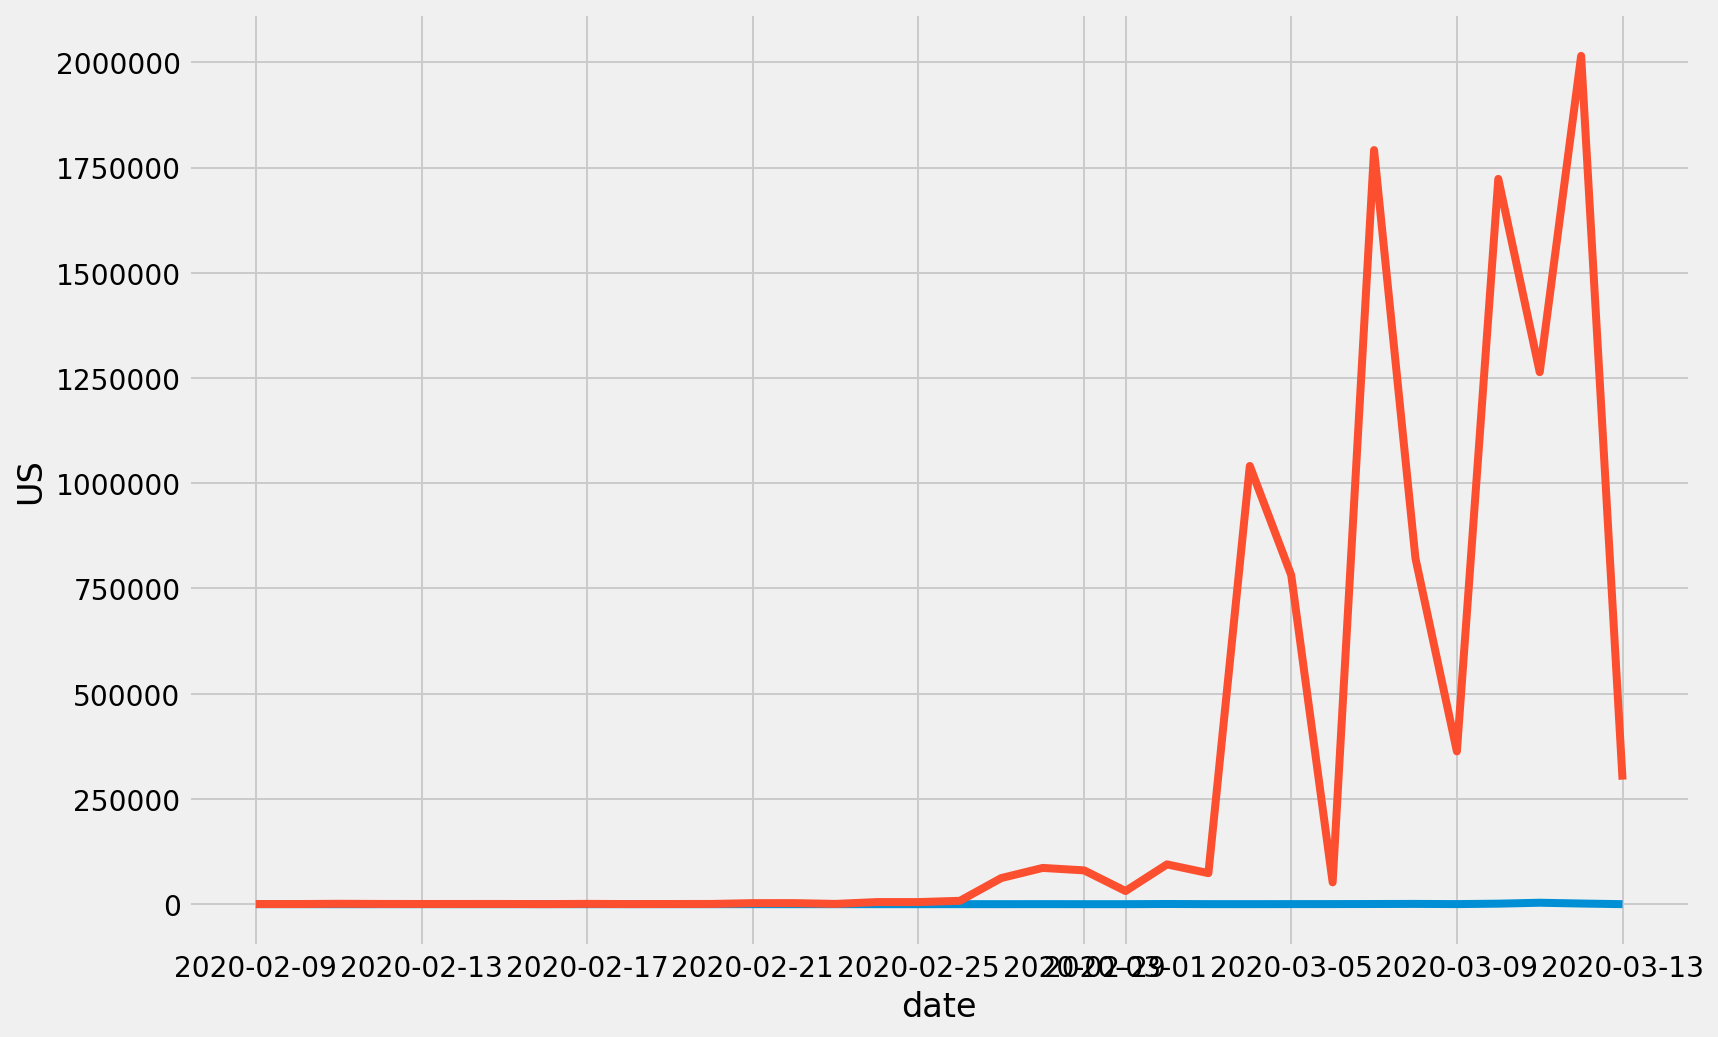

In [247]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x="date", y="US_confirmed_cases", data=testing_cases)
ax = sns.lineplot(x="date", y="US", data=testing_cases)

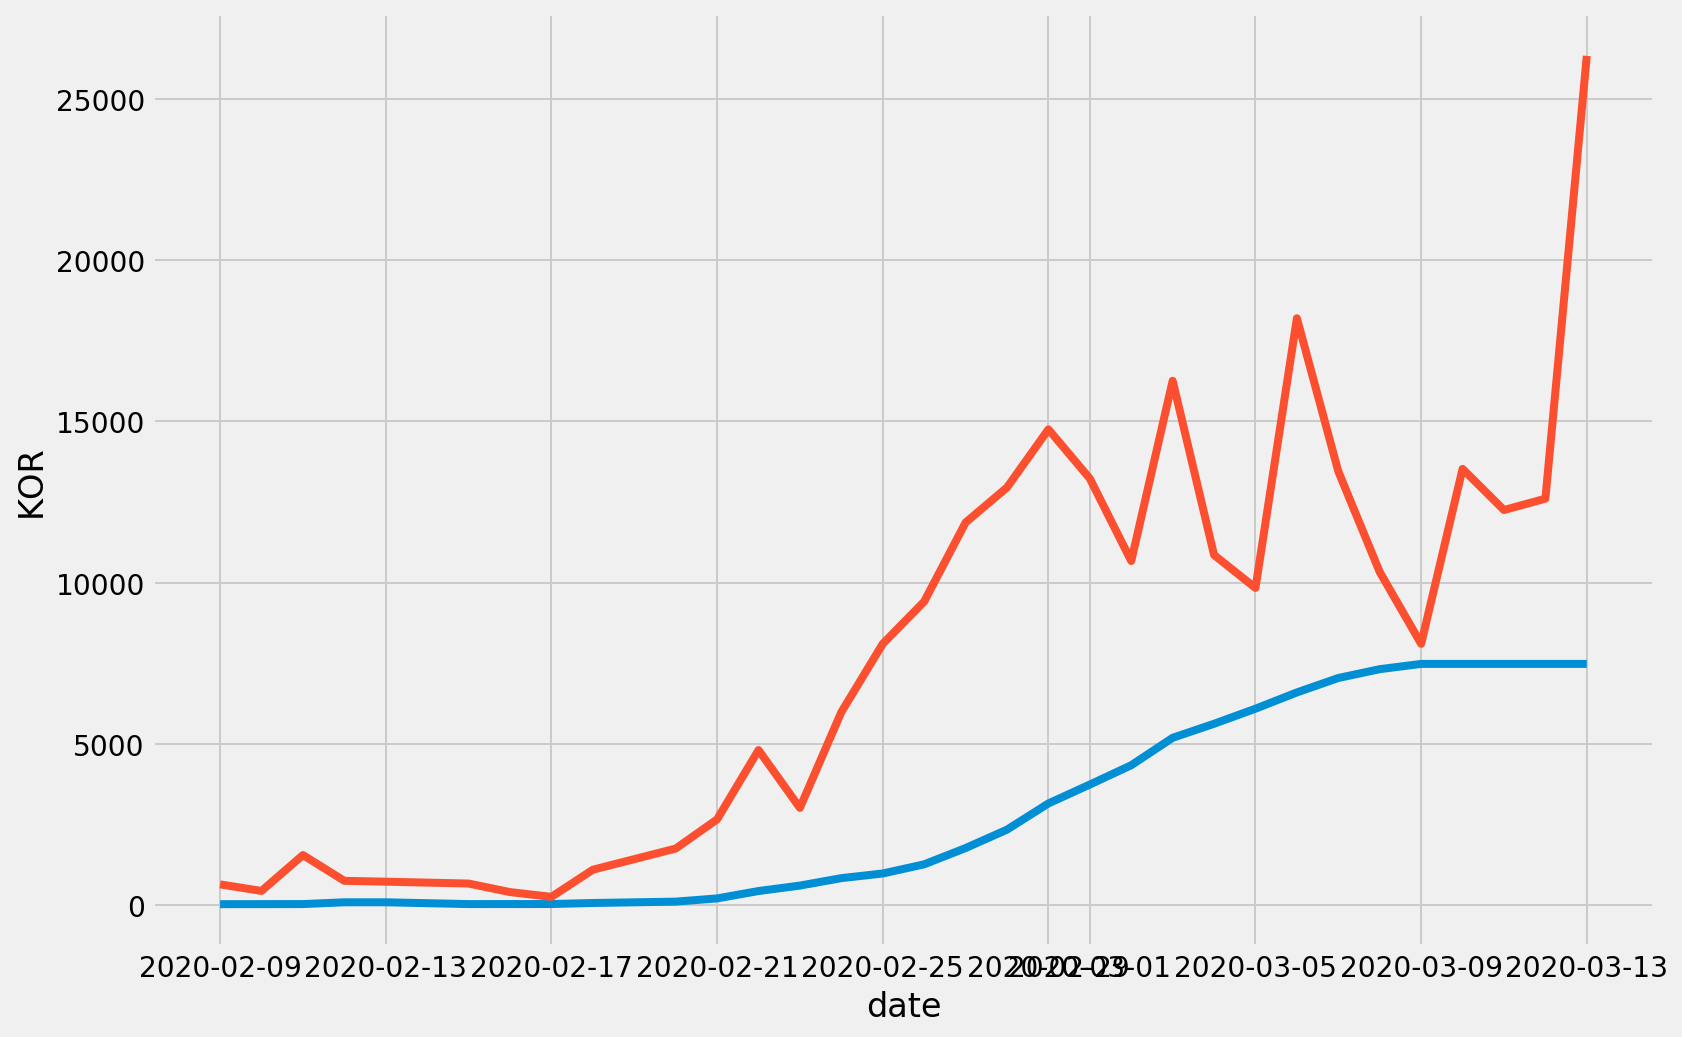

In [248]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x="date", y="SKorea_confirmed_cases", data=testing_cases)
ax = sns.lineplot(x="date", y="KOR", data=testing_cases)

## Write to CSV

In [250]:
testing_cases.head()

,date,US,KOR,US_confirmed_cases,SKorea_confirmed_cases
0,2020-02-09,362,639.0,62.0,25.0
1,2020-02-10,371,436.0,62.0,27.0
2,2020-02-11,951,1549.0,2.0,28.0
3,2020-02-12,561,749.0,2.0,84.0
4,2020-02-13,471,723.0,42.0,84.0
